<a href="https://colab.research.google.com/github/taikicoco/Algorithms-for-Bandit-Problems/blob/main/work/GauusianProcess/GP-bandit/DiscretizationThompsonSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
f(x) = 0.05 \times exp\biggl(  \frac{-(x-0.25)^2}{0.02} \biggr) + 0.01 \times exp\biggl(  \frac{-(x-7.25)^2}{0.01} \biggr)
$$

$$
reward ∼ Bernoulli (p)
$$

$$ x ∈ {0 \leq x \leq 1} $$

In [293]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import random

In [363]:
def func2(x,mu=0.5,sigma=0.1):
  # p = 0.05*np.exp(-(x-mu/2)**2/(sigma/5)) + 0.1*np.exp(-(x- (mu/2 + mu)) **2/(sigma/10))
  p = 0.8*np.exp(-(x-mu)**2/sigma)
  return np.random.binomial(1,p),p

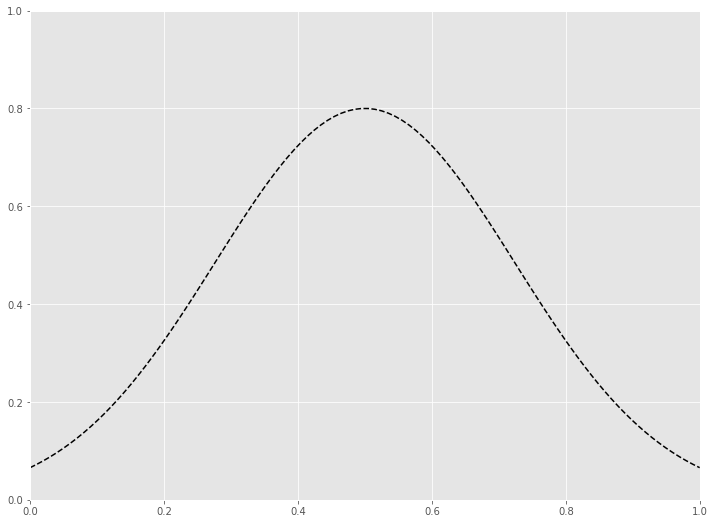

In [364]:
x = np.linspace(0, 1, 100)
y = func2(x)[1]
plt.plot(x, y, label='true', linestyle='dashed', color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [365]:
arms_number =  len(y)#選択数 

class Env():
  thetas = y

  def react(arm):
    if np.random.random() < Env.thetas[arm]:
      return 1
    else:
      return 0

  def opt():
    return np.argmax(Env.thetas)

In [366]:
def sim(Agent, T=1000):
  selected_arms = [0 for _ in range(T)]
  earned_rewards = [0 for _ in range(T)]
  sum_reward = 0

  for i in range(T):
    arm = Agent.get_arm()
    reward = Env.react(arm)
    Agent.sample(arm, reward)
    sum_reward += reward
    selected_arms[i] = arm
    earned_rewards[i] = sum_reward
    result = [Agent.counts, Agent.wins]
  return np.array(selected_arms), np.array(earned_rewards), result

In [367]:
class TSAgent():

  def __init__(self):
    self.counts = [0 for _ in range(arms_number)]
    self.wins = [0 for _ in range(arms_number)]
  
  def get_arm(self):
    beta = lambda N, a: np.random.beta(a + 1, N - a + 1)
    result = [beta(self.counts[i], self.wins[i]) for i in range(arms_number)]
    arm  = result.index(max(result))
    return arm
  
  def sample(self, arm, reward):
    self.counts[arm] = self.counts[arm] + 1
    self.wins[arm] = self.wins[arm] + reward
    if arm >= 1:
      self.wins[arm -1] = self.wins[arm] + reward
      self.counts[arm -1] = self.counts[arm] + 1
    if arm <= len(x) -2:
      self.wins[arm +1] = self.wins[arm] + reward
      self.counts[arm +1] = self.counts[arm] + 1

In [368]:
class randomAgent():

  def __init__(self):
    self.counts = [0 for _ in range(arms_number)]
    self.wins = [0 for _ in range(arms_number)]
  
  def get_arm(self):
    arm = random.randrange(arms_number)
    return arm
  
  def sample(self, arm, reward):
    self.counts[arm] = self.counts[arm] + 1
    self.wins[arm] = self.wins[arm] + reward

In [369]:
total = 0
for i in range(10):
  arms_ts, rewards_ts, result_ts = sim(TSAgent())
  print("合計",rewards_ts[-1])
  total += rewards_ts[-1]
print(total)

合計 683
合計 744
合計 741
合計 698
合計 731
合計 731
合計 724
合計 688
合計 718
合計 722
7180


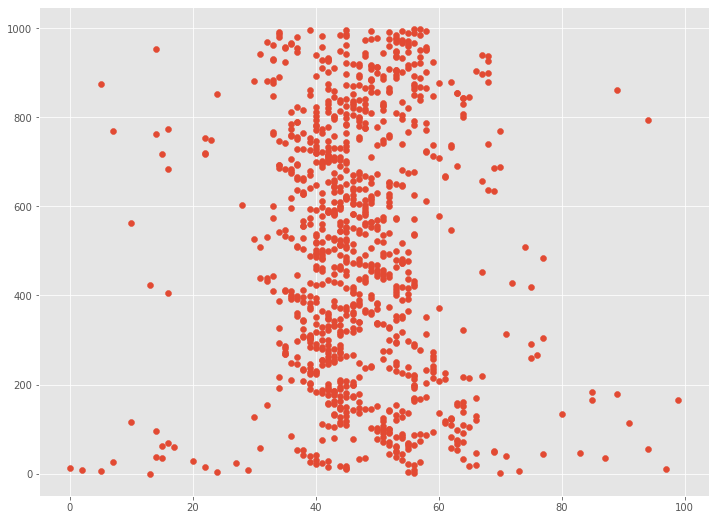

In [375]:
plt.scatter(arms_ts,range(len(arms_ts)))
plt.show()

In [342]:
arms_random, rewards_random, result_random = sim(randomAgent())

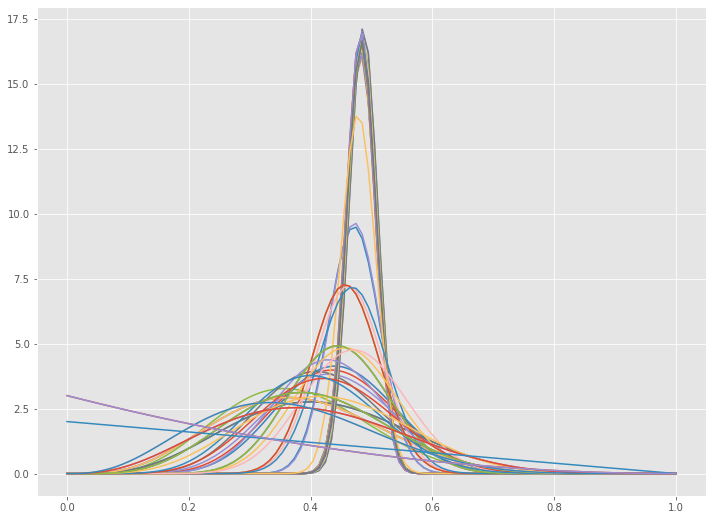

In [372]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = [12, 9] 
plt.subplot(1, 1, 1)
for i in range(len(result_ts[0])):
  plt.plot(x, beta.pdf(x, result_ts[1][i], result_ts[0][i]))
plt.show()